In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pyqg
from time import time
import os
import glob
from pyqg_generative.tools.plot_helpers import *
from pyqg_generative.tools.comparison_tools import dataset_smart_read
from pyqg_generative.tools.operators import ave_lev
%load_ext autoreload
%autoreload 3

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/pp2681/pyqg_experiments/pyqg_subgrid_experiments/__init__.py:19: UserWarning: Unable to load differentiable_parameterizations, install autograd if you want to use these
  warnings.warn("Unable to load differentiable_parameterizations, install autograd if you want to use these")


# First impression of the configuration

In [2]:
ds = {}
for res in ['48', '64', '96', '256']:
    ds[res] = dataset_smart_read(f'/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_{res}/[0-9].nc', delta=0.25)    

/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_48/[0-9].nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_64/[0-9].nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_96/[0-9].nc
/scratch/pp2681/pyqg_generative/Reference-Default-scaled/eddy/reference_256/[0-9].nc


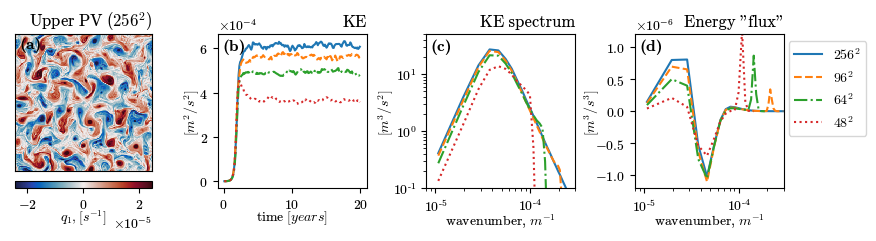

In [24]:
default_rcParams({})
matplotlib.rcParams.update({'figure.subplot.wspace': 0.4})
ls = {'256': '-', '96': '--', '64': '-.', '48': ':'}

plt.subplot(1,4,1)
q = ds['256'].q.isel(time=-1,run=0,lev=0)
imshow(q, cbar_label='$q_1, [s^{-1}]$', location='bottom')
plt.title('Upper PV ($256^2$)')
plt.subplot(1,4,2)
for res in ['256', '96', '64', '48']:
    ds[res].KE_time.plot(ls=ls[res])
    plt.ylabel('[$m^2/s^2$]')
    plt.title('KE')
plt.subplot(1,4,3)
for res in ['256', '96', '64', '48']:
    ds[res].KEspecr_mean.plot(ls=ls[res])
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([1e-1, 5e+1])
    plt.xlim([8e-6,3e-4])
    plt.ylabel('[$m^3/s^2$]')
    plt.title('KE spectrum')
plt.subplot(1,4,4)
for res in ['256', '96', '64', '48']:
    ds[res].Efluxr.plot(ls=ls[res], label=f'${res}^2$')
    plt.xscale('log')
    plt.xlim([8e-6,3e-4])
    plt.ylim([-1.2e-6, 1.2e-6])
    plt.legend(ncol=1, bbox_to_anchor=(1.6,1), loc='upper right')
    plt.ylabel('[$m^3/s^3$]', labelpad=-5)
    plt.title('Energy "flux"')
set_letters()
plt.savefig('paper_figures_1/fig1.pdf')

In [14]:
show_rcparams('loc')

axes.formatter.use_locale False
axes.titlelocation center
legend.loc best
xaxis.labellocation center
yaxis.labellocation center
